# Test 8: t-test for two population means (variances unknown but equal)

## Objective

- To investigate the significance of the difference between the means of two populations.

## Assumptions

- Assume variance of both populations are equal
- If the variance is known, use **Test 2: Z-test for two population means**
- The test is accurate only if the populations are normally distributed. 
    - If the populations are not normal, the test will give an approximate guide

## Method

- Assume you have 2 populations with means $mu_1$ and $mu_2$
- I take samples of both populations of size $n_1$ and $n_2$
- From this, I compute the sample means $\bar{x_1}$ and $\bar{x_2}$
- For the sample, I compute the sum of squared differences for each population
$$\begin{aligned}
    s_1^2 &= \frac{\sum_{i=1}^{n_1} (x_i - \bar{x_1})^2}{n-1} \\
    s_2^2 &= \frac{\sum_{i=1}^{n_2} (x_i - \bar{x_2})^2}{n-1} \\
\end{aligned}$$

- Using these, we compute a pooled estimate of population variance
$$\begin{aligned}
    s^2 &= \frac{[(n_1 - 1) \cdot s_1^2 + (n_2 - 1) \cdot s_2^2]}{n_1 + n_2 - 2}
\end{aligned}$$

- Finally, we can compute the test statistic as
$$\begin{aligned}
    t &= \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{s \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
\end{aligned}$$

## Example

- Problem
    - Two snack foods are made and sold in 30 gm packets. 
    - Samples of size $n_1=12, n_2=12$ are taken from two production lines of each snack food and means $\mu_1, \mu_2$ and sum of squared differences $s_1, s_2$ obtained (see formulas above)
    - From these, it is found that 
        - $\bar{x_1} = 31.75$
        - $s_1^2 = 112.25$ 
        - $\bar{x_2} = 28.67$
        - $s_2^2 = 66.64$ 

- Question
    - Do the 2 processes produce outputs of the same weight?
    - Is process 1 producing heavier/lighter products?

In [7]:
n1 = n2 = 12
mu1=mu2=30
xbar1 = 31.75
xbar2 = 28.67
s1_sq = 112.25
s2_sq = 66.64
degrees_of_freedom = n1 + n2 - 2

def compute_pooled_variance(n1, n2, s1_sq, s2_sq):
    return (((n1-1) * s1_sq) + ((n2-1) * s2_sq))/(n1 + n2 - 2)

s_sq = compute_pooled_variance(n1, n2, s1_sq, s2_sq)

def compute_test_statistic(xbar1, xbar2, mu1, mu2, n1, n2, s_sq):
    return ((xbar1 - xbar2) - (mu1 - mu2)) / (s_sq * (1/n1 + 1/n2))**0.5

print(f'{degrees_of_freedom=}')
compute_test_statistic(xbar1, xbar2, mu1, mu2, n1, n2, s_sq)

degrees_of_freedom=22


0.7977160084385088

## Proof by simulation that test statistic is t-distribution

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Assume equal mean and variance under null hypothesis
POPULATION_MEAN_1 = 5
POPULATION_MEAN_2 = 5
UNKNOWN_POPULATION_SIGMA_1 = 2
UNKNOWN_POPULATION_SIGMA_2 = 2
SAMPLE_SIZE_1 = 100
SAMPLE_SIZE_2 = 234

def compute_sample_mean_and_variance(population_mean, unknown_population_sigma, sample_size):
    sample = np.random.normal(population_mean, unknown_population_sigma, sample_size)
    
    sample_mean = np.mean(sample)
    sample_variance = np.sum((sample - sample_mean)**2)/(sample_size-1)

    return sample_mean, sample_variance

def compute_pooled_population_variance(sample_variance_1, sample_variance_2, sample_size_1, sample_size_2):
    return (
        (((sample_size_1 - 1) * sample_variance_1) + ((sample_size_2 - 1) * sample_variance_2)) / (sample_size_1 + sample_size_2 - 2)
    )

tuples_1 = [compute_sample_mean_and_variance(POPULATION_MEAN_1, UNKNOWN_POPULATION_SIGMA_1, SAMPLE_SIZE_1) for _ in range(10_000)]

tuples_2 = [compute_sample_mean_and_variance(POPULATION_MEAN_2, UNKNOWN_POPULATION_SIGMA_2, SAMPLE_SIZE_2) for _ in range(10_000)]

sample_means_1 = np.array([x[0] for x in tuples_1])
sample_variance_1 = np.array([x[1] for x in tuples_1])
sample_means_2 = np.array([x[0] for x in tuples_2])
sample_variance_2 = np.array([x[1] for x in tuples_2])

S_SQ = compute_pooled_population_variance(sample_variance_1, sample_variance_2, SAMPLE_SIZE_1, SAMPLE_SIZE_2)

0.01495123182564589
0.9965888362462519


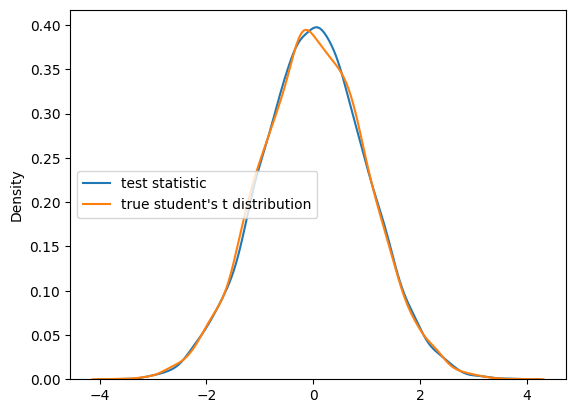

In [22]:
test_statistic_distribution = (
    ((sample_means_1 - sample_means_2) - (POPULATION_MEAN_1 - POPULATION_MEAN_2)) / (S_SQ**0.5 * (1/SAMPLE_SIZE_1 + 1/SAMPLE_SIZE_2)**0.5)
)

degrees_of_freedom = SAMPLE_SIZE_1+SAMPLE_SIZE_2-2
true_students_t_distribution = np.random.standard_t(degrees_of_freedom, 10_000)

print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_students_t_distribution, label="true student's t distribution")
plt.legend()
# test_statistic_distribution